In [24]:
from sklearn import datasets
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [38]:
X = iris.data[:  , 3:]
y = (iris['target'] == 2).astype(np.int)

In [39]:
X.shape

(150, 1)

In [40]:
y.shape

(150,)

# Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X , y)

LogisticRegression()

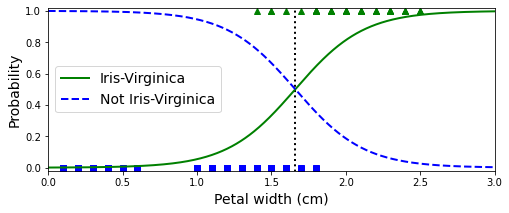

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()


# For all Classes

In [57]:
X = iris.data[: , (2 , 3)]
Y = iris.target

In [60]:
softmax_regressor = LogisticRegression(multi_class='multinomial' , solver = 'lbfgs' , C= 10)
softmax_regressor.fit(X , Y)

LogisticRegression(C=10, multi_class='multinomial')

In [62]:
softmax_regressor.predict([[5 , 2]])

array([2])

In [65]:
iris.target_names[softmax_regressor.predict([[5 , 2]])]

array(['virginica'], dtype='<U10')

In [68]:
softmax_regressor.predict_proba([[5 , 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [67]:
np.argmax(softmax_regressor.predict_proba([[5 , 2]]))

2